# Logistic regression classifier

The task is to train a binary classifier based on logistic regression model.

So, we have class 1 and class 2 and the corresponding probabilities are given by $p_1$ and $p_2$:

$p_1 = p(x;w) = \sigma(w^T x)$

$p_2=(1 - p)$, and $\sigma(z)$ is the sigmoid logistic function,

$\sigma(z) = \frac{1}{1+\exp(-z)}$,

$x$ is the input and $w$ is the vector of parameters. Here we assume that input vector $x$ includes the constant term 1 so that there is no bias term.

The log likelihood for each of the training samples is given by:
\begin{equation*}
L(x_i;w)=  y_i \text{log } p(x_i;w) + (1-y_i) \text{log } (1-p(x_i;w)),
\end{equation*}

And log-likelohood for the training set of $N$ samples can be expressed as

\begin{equation*}
L(w)= \frac{1}{N} \big( \sum_{i=1}^N y_i(w^T x_i) - \text{log}(1+e^{w^T x_i})  \big).
\end{equation*}

Given that
\begin{equation*}
\frac{\partial L}{\partial w} = X^T (y - p),
\end{equation*}

where $p$ is a vector of values $p$ for each of the training samples.
Fit the parameters of the model that by maximizing the log-likelihood of the loss function.

Use digits images for classification and choose only digits "4" and "9" from the data set so that it is a binary classification. Do a train and test split. Plot the likelihood and the accuracy of the classifier on the train and test data.

**Note**.

Mind the numerical problems you will have when computing log of zero probabilities. Add a small positive constant, e.g. $10^{-8}$ in order to avoid that.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.linalg import norm
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing  import  StandardScaler
from sklearn.datasets import fetch_mldata
from sklearn.utils  import  shuffle

C:\Users\serge\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def score(data, targets, w):
    true_predict = 0
    for i in range(len(targets)):
        y = sigmoid(w@data[i])
        if abs(y - targets[i]) <= 0.5:
            true_predict += 1
    return true_predict/len(targets)

In [4]:
def cost_function(beta, X, y, lam):
    cost2 = lam*norm(beta, ord = 2) 
    h = sigmoid(beta@X.T)
    cost1 = -sum(y*np.log(h + 10**-8) + (1-y)*np.log(1 - h + 10**-8))
    return (cost1+cost2)/(X.shape[0])

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
def feature_scale(x):
    scaler = StandardScaler()
    scaler.fit(x[ :, 1:])
    x_norm = scaler.transform (x[ :, 1:])
    X_scaled = (np.concatenate((x[ :, :1].T, x_norm.T), axis=0)).T
    return X_scaled

In [37]:
def logistic_regression_GD(X, y, lam, alpha, max_cost_before_break=1000,  max_count=None):
    beta = np.zeros(X.shape[1])
    cnt = 0
    costs = {}
    while True:
        h = sigmoid(beta@X.T)
        beta -= alpha*(-y + h)@X  + lam*2*beta
        costs[cnt] = cost_function(beta, X, y, lam)
        if costs[cnt] > max_cost_before_break:
            break
        if cnt > max_count:
            break
        cnt += 1
    return beta, costs

# Подготовка данных

In [38]:
lam = 0.001
alpha = 0.1
epoch = 80
mnist = fetch_mldata('MNIST original')
y = mnist.target
X = mnist.data.astype('float64')
data = []
targets = []
x0 = np.array(len(X)*[1])
X = np.vstack((x0.T, np.array(X).T)).T
X = feature_scale(X)
X, y = shuffle(X, y)
for i in range(len(y)):
    if y[i] == 4:
        targets.append(1)
        data.append(X[i])
    if y[i] == 9:
        targets.append(0)
        data.append(X[i])
X_train, X_test, y_train, y_test = train_test_split(np.array(data), np.array(targets), test_size = 0.2, random_state = 7)

In [50]:
beta, costs = logistic_regression_GD(X_train, y_train, lam, alpha, 1000, epoch)

C:\Users\serge\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


# Точность

In [53]:
score(X_test, y_test, beta)

C:\Users\serge\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.9720710917664128

In [54]:
costs

{0: 2.254563872604832,
 1: 1.4990523651126653,
 2: 1.06018654063013,
 3: 0.8234731953524107,
 4: 0.769675597928207,
 5: 0.7337093384557217,
 6: 0.6926328722126442,
 7: 0.6555125918827464,
 8: 0.6322570762818245,
 9: 0.6060054892214832,
 10: 0.5750792490442762,
 11: 0.5788532536927469,
 12: 0.5387439240921904,
 13: 0.5499079173261406,
 14: 0.5136242270057568,
 15: 0.5399378718549135,
 16: 0.5003707804617947,
 17: 0.512432278146098,
 18: 0.4999006980538692,
 19: 0.5117852148380607,
 20: 0.4948239914006457,
 21: 0.5139494077770992,
 22: 0.48873034347538996,
 23: 0.5241576978772194,
 24: 0.48520493909381895,
 25: 0.5423348664036194,
 26: 0.5154190368875775,
 27: 0.6398129331959377,
 28: 0.8043891071078941,
 29: 1.893893937849402,
 30: 3.9490551727710193,
 31: 6.050553919692064,
 32: 3.8934396627879932,
 33: 1.7929023976282705,
 34: 0.8397346326680648,
 35: 0.8149137054742517,
 36: 0.7761627869149912,
 37: 0.7372848741689978,
 38: 0.711734275671388,
 39: 0.6768862197666791,
 40: 0.654661563

# разделение сгенерированных данных

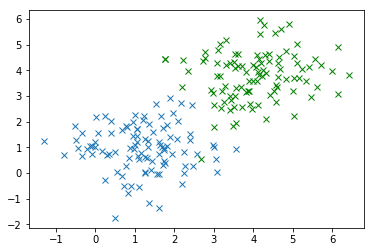

NameError: name 'feature_scale' is not defined

In [3]:
#2
cov = [[1, 0], [0, 1]]
a = np.random.multivariate_normal((1,1), cov, 100)
b = np.random.multivariate_normal((4,4), cov, 100)
plt.show()
a = np.append(a, b)
a = a.reshape(200, 2)

x0 = np.array(len(a)*[1])
a = np.vstack((x0.T, np.array(a).T)).T
a = feature_scale(a)
b = []
for i in range(100):
    b.append(0)
for i in range(100,200):
    b.append(1)

In [58]:

X_1, X_2, y_1, y_2 = train_test_split(np.array(a), np.array(b), test_size = 0.2, random_state = 7)
beta, costs = logistic_regression_GD(X_1, y_1, lam, alpha, 1000, 1000)
score(X_2, y_2, beta)

0.975

In [65]:
def Plot_2d_grapic (GD_theta, train_data, train_labels):
    slope = -(GD_theta[0]/GD_theta[2])/(GD_theta[0]/GD_theta[1])
    intercept = -GD_theta[0]/GD_theta[2]
    xx = np.linspace(-4, 4)
    yy = slope*xx + intercept
    plt.plot(xx, yy)
    if len(GD_theta) == 3:
        z = [False, True, True]
        Plot_train_data =  train_data.compress(z, axis=1)
    else:
        Plot_train_data =  train_data.compress
    for i in range(len(train_data)):
        plt.plot(Plot_train_data[i][0], Plot_train_data[i][1],'gx' if (train_labels[i] == 1.0) else 'bx')

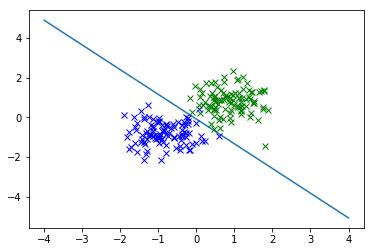

In [66]:
Plot_2d_grapic (beta, a, b)